# Californian Housing Price

## Business Problem
---
Seiring berjalannya waktu, penduduk di Dunia terus mengalami peningkatan yang mengakibatkan banyaknya individu ataupun keluarga yang membutuhkan tempat tinggal / rumah untuk tempat bernaung yang sesuai dengan tingkat kemampuan seseorang tersebut dalam membeli rumah.
Yang mana hal ini menjadi tantangan untuk pihak __Penyedia Rumah__ untuk mengetahui rumah seperti apa yang akan dibangun di suatu lokasi dengan memperhitungkan tingkat `pendapatan penduduk`, lokasi `latitude` dan `longitude`, tingkat kepadatan `populasi`, maupun `jumlah kamar` yang dibutuhkan oleh keluarga dengan `jumlah keluarga yang ada (household)`.

## Goals
---
Dataset yang digunakan adalah Californian House Price yang dimana pada Project kali ini membuat machine learning untuk memprediksi harga rumah, yang dimana pada hasil akhir akan menampilkan model terbaik untuk memprediksi harga rumah yang akan dibangun ataupun yang sudah ada agar sesuai untuk divisi marketing pasarkan dan diharapkan dapat meningkatkan pemasaran dengan harga dan unit rumah yang tepat.

## Machine Learning
---
Pada proses pembuatan machine learning sebelumnya perlu dilakukan dulu `data cleaning`, `feature selection` dan `feature engineering`.
Pada Machine Learning yang dibuat ini menggunakan Regresi / Regression yang dimana pada hasil akhirnya akan menghasilkan prediksi harga yang akan ditampilkan dengan berbagai features akan akan di input oleh user.
Lalu pada proses pembuatan machine learning kali ini menggunakan metode **Pipeline**.

## Penggunaan Model
---
Untuk Model yang digunakan terdapat 5 model yaitu:

- Support Vector Regression (SVR)
- K-Nearest Neighbors (KNN)
- Decision Tree (DTree)
- Random Forest (RF)
- XGBoost (XGB)

Dari ke 5 model tersebut nantinya model base terbaik akan dilakukan Tuning sehingga akan menghasilkan nilai yang lebih baik dalam memprediksi hasil yang diinginkan.

## Conclusion dan Recommendation
---
Setelah model terbaik di Tuning maka akan terlihat perbedaannya, lalu setelah itu dilakukan pengecekan Error untuk melihat kapan model dapat dipercaya dan kapan model tidak dapat dipercaya, setelah itu dapat di lakukan:
- Conclusion, yang mana menarik kesimpulan dari Machine Learning yang telah dibuat
- Recommendation, yang mana memberi rekomendasi berdasarkan dari Conclusion yang ada, tujuannya agar dapat meningkatkan Prediksi Machine Learning yang telah dibuat agar lebih tepat dengan Error yang sedikit.

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


### **Data Understanding**

In [3]:
dfDesc = []
for i in df.columns:
    dfDesc.append([i, 
                   df[i].dtypes, 
                   df[i].isna().sum(),
                   round(((df[i].isna().sum() / len(df)) * 100), 2),
                   df[i].nunique(),
                   df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(
data=dfDesc,
columns = [
    'features',
    'DataType',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

,features,DataType,Null,NullPercentage,Unique,Unique Sample
0,longitude,float64,0,0.00,806,"[-122.2, -123.59]"
1,latitude,float64,0,0.00,836,"[38.02, 34.29]"
2,housing_median_age,float64,0,0.00,52,"[21.0, 40.0]"
3,total_rooms,float64,0,0.00,5227,"[867.0, 2953.0]"
4,total_bedrooms,float64,137,0.95,1748,"[1249.0, 1353.0]"
5,population,float64,0,0.00,3498,"[2758.0, 2047.0]"
6,households,float64,0,0.00,1649,"[60.0, 122.0]"
7,median_income,float64,0,0.00,9797,"[3.1713, 2.1571]"
8,ocean_proximity,object,0,0.00,5,"[NEAR BAY, <1H OCEAN]"
9,median_house_value,float64,0,0.00,3548,"[482900.0, 299200.0]"


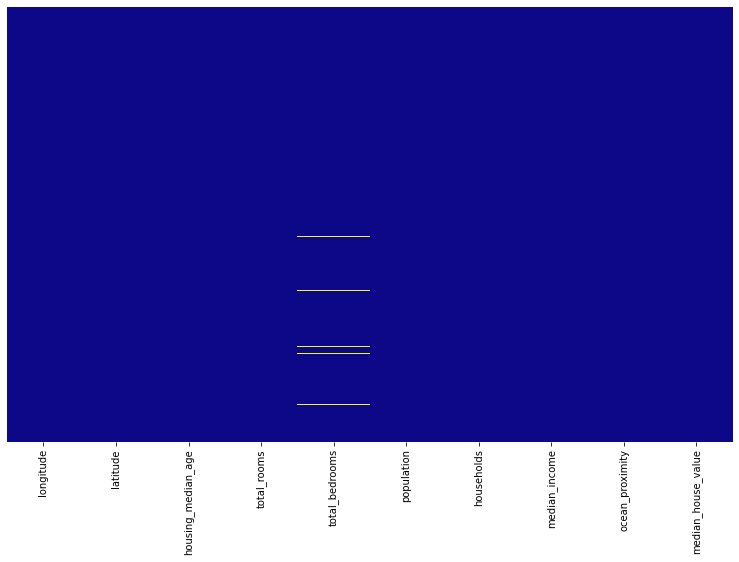

In [4]:
# Pengecekan Missing Value dengan Heatmap
plt.figure(figsize=(13,8))
sns.heatmap(df.isna(), cmap='plasma', cbar=False, yticklabels=False)
plt.show()

In [5]:
## Mengatasi Missing Value
df.dropna(inplace=True)

In [6]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

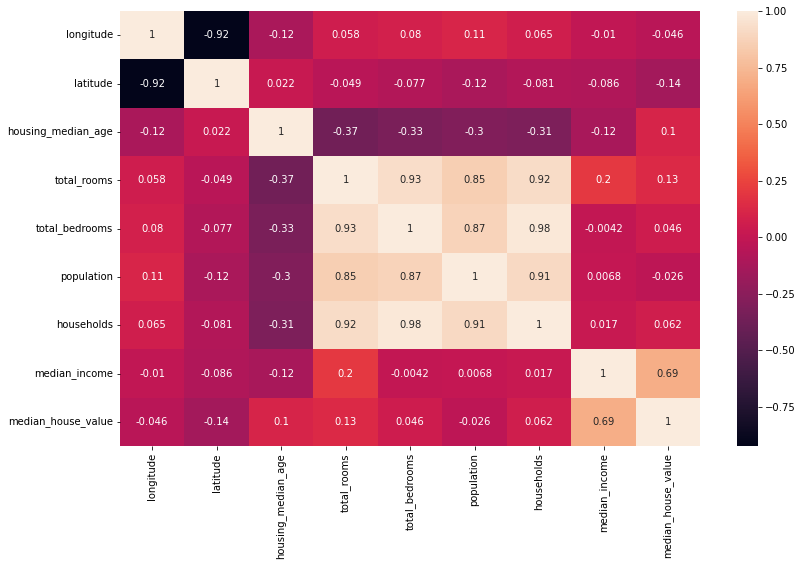

In [7]:
# Pengecekan Korelasi
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

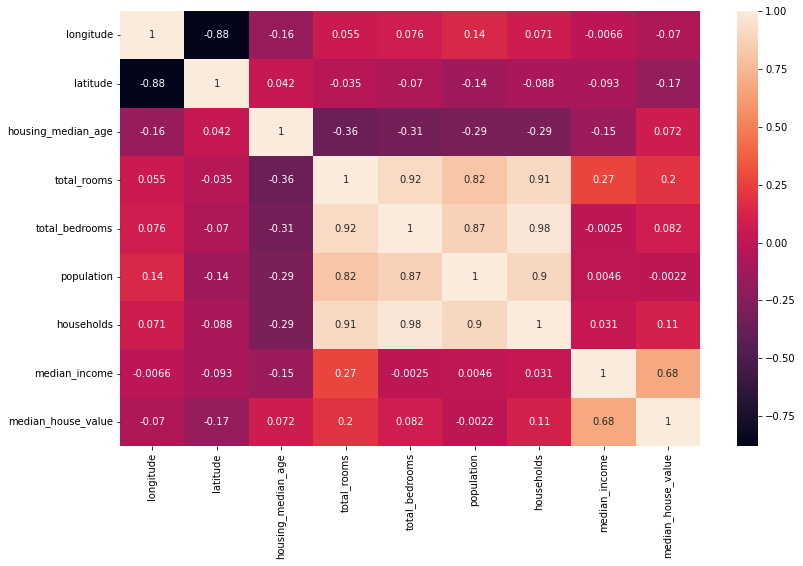

In [8]:
# Pengecekan Korelasi dengan Spearman
plt.figure(figsize=(13,8))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

In [9]:
# Cek jumlah rumah berdasarkan ocean proximity
print(f"Jumlah rumah di tiap nocean proximity:\n{df['ocean_proximity'].value_counts()}")

Jumlah rumah di tiap nocean proximity:
<1H OCEAN     6300
INLAND        4544
NEAR OCEAN    1855
NEAR BAY      1610
ISLAND           2
Name: ocean_proximity, dtype: int64


Text(0.5, 1.0, 'House Location')

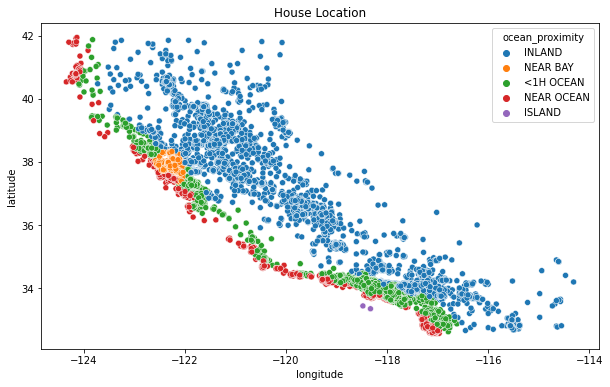

In [10]:
# Membuat Plot untuk mengetahui persebaran Data
plt.figure(figsize=(10, 6))
sns.scatterplot(df['longitude'], df['latitude'], hue=df['ocean_proximity']).set_title('House Location')

In [11]:
# Membuat Sub-Data
df_1 = df.drop(columns=['housing_median_age'])

Kolom housing_median_age di drop karena memiliki korelasi yang rendah

### Splitting Data

In [12]:
X = df_1.drop(columns=['median_house_value'])
y = df_1['median_house_value']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.20, random_state=42)

In [14]:
X_train.head()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
962,-122.31,37.93,1526.0,256.0,696.0,263.0,3.5089,NEAR BAY
2950,-120.44,34.87,2312.0,352.0,1084.0,388.0,5.0380,<1H OCEAN
8939,-122.23,37.82,1611.0,203.0,556.0,179.0,8.7477,NEAR BAY
2891,-122.25,37.79,629.0,188.0,742.0,196.0,2.6458,NEAR BAY
8683,-118.18,34.06,2025.0,565.0,2189.0,577.0,2.6083,<1H OCEAN


### Modelling

In [15]:
pd.options.display.float_format = '{:.2f}'.format

In [16]:
def Eva_Matrix_DF(Model,X_train, X_test, y_train, y_test, Nama):
    y_pred_tr = Model.predict(X_train)
    R2_tr = r2_score(y_train, y_pred_tr)
    MAE_tr = mean_absolute_error(y_train, y_pred_tr)
    MSE_tr = mean_squared_error(y_train, y_pred_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    y_pred_ts = Model.predict(X_test)
    R2_ts = r2_score(y_test, y_pred_ts)
    MAE_ts = mean_absolute_error(y_test, y_pred_ts)
    MSE_ts = mean_squared_error(y_test, y_pred_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    data = {
        'Training' + Nama : [R2_tr, MAE_tr, MSE_tr, RMSE_tr],
        'Testing' + Nama : [R2_ts, MAE_ts, MSE_ts, RMSE_ts]}
    df = pd.DataFrame(data=data, index = ['R2', 'MAE', 'MSE', 'RMSE'])
    return df

### Membuat Pipeline Model

In [17]:
# Pipeline yang Modelnya menggunakan Scaller
num_columns = ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
cat_columns = ['ocean_proximity']

numeric_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('power', PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns)
], remainder='passthrough')

pipe_SVR = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR())
])

pipe_KNN = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor())
])

In [18]:
# Pipeline yang Modelnya tidak menggunakan Scaller
num_columns = ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
cat_columns = ['ocean_proximity']

numeric_pipeline = Pipeline([
    # ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('power', PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns)
], remainder='passthrough')

pipe_DTree = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeRegressor())
])

pipe_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor())
])

pipe_XGB = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor())
])

In [19]:
# Mentraining Data
dfbase = [pipe_SVR, pipe_KNN, pipe_DTree, pipe_RF, pipe_XGB]

for i in dfbase:
    i.fit(X_train, y_train)

In [20]:
# Evaluasion Matrix
df_SVR_base = Eva_Matrix_DF(pipe_SVR, X_train, X_test, y_train, y_test, 'Base SVR')
df_KNN_base = Eva_Matrix_DF(pipe_KNN, X_train, X_test, y_train, y_test, 'Base KNN')
df_DTree_base = Eva_Matrix_DF(pipe_DTree, X_train, X_test, y_train, y_test, 'Base DTree')
df_RF_base = Eva_Matrix_DF(pipe_RF, X_train, X_test, y_train, y_test, 'Base RF')
df_XGB_base = Eva_Matrix_DF(pipe_XGB, X_train, X_test, y_train, y_test, 'Base XGB')

In [21]:
# Menampilkan Hasil Evaluasi Matrix
df_all = pd.concat([df_SVR_base, df_KNN_base, df_DTree_base, df_RF_base, df_XGB_base], axis=1)
df_all

,TrainingBase SVR,TestingBase SVR,TrainingBase KNN,TestingBase KNN,TrainingBase DTree,TestingBase DTree,TrainingBase RF,TestingBase RF,TrainingBase XGB,TestingBase XGB
R2,-0.05,-0.05,0.81,0.68,1.00,0.43,0.96,0.71,0.96,0.80
MAE,88966.56,85071.59,34779.93,43016.72,0.00,56005.08,15220.28,41213.12,16491.45,33886.95
MSE,14259006221.98,13061011057.37,2620613689.36,3959330730.63,0.00,7084322040.98,505776446.52,3592137215.43,526024502.20,2498281492.73
RMSE,119411.08,114284.78,51191.93,62923.21,0.00,84168.41,22489.47,59934.44,22935.22,49982.81


### Dapat dilihat dari Nilai yang sudah ada bahwa:
- 2 Model dengan Nilai RMSE terbaik adalah Model Random Forest dan XGBoost
- 2 Model tersebut memiliki nilai RMSE yang lebih rendah dibandingkan dengan Model lain, sehingga perlu dilakukan Hyper Parameter Tuning
- Model dengan Nilai terburuk adalah Model SVR dengan hasil nilai RMSE yang tinggi
- Model yang akan dilakukan Tunning adalah Model XGB

# Improvement

### XG Boost Hyper Parameter Tuning

In [22]:
# Menampilkan parameter apa saja yang dapat digunakan
pipe_XGB.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('poly',
                                                     PolynomialFeatures(degree=3,
                                                                        include_bias=False)),
                                                    ('power',
                                                     PowerTransformer())]),
                                    ['longitude', 'latitude', 'total_rooms',
                                     'total_bedrooms', 'population', 'households',
                                     'median_income']),
                                   ('categoric',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(drop='first'))]),
                                    ['ocean_proximity'])])),
  ('algo',
   XGBRegres

In [23]:
# Kedalaman pohon
max_depth = list(np.arange(1, 10))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
param_XGB = {
    'algo__max_depth': max_depth, 
    'algo__learning_rate': learning_rate,
    'algo__n_estimators': n_estimators,
    'algo__subsample': subsample,
    'algo__gamma': gamma,
    'algo__colsample_bytree': colsample_bytree,
    'algo__reg_alpha': reg_alpha
}

In [24]:
RS_XGB = RandomizedSearchCV(pipe_XGB, param_XGB, cv = 4, n_jobs=-1, verbose=1, scoring ='neg_root_mean_squared_error', n_iter=1000)

Alasan saya menggunakan Randomized Search karena jika memakai Grid Search terlalu banyak jumlah kombinasi yang dapat mengakibatkan device crash, sehingga agar lebih optimal menggunakan Randomized Search

In [25]:
RS_XGB.fit(X_train, y_train)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('poly',
                                                                                                PolynomialFeatures(degree=3,
                                                                                                                   include_bias=False)),
                                                                                               ('power',
                                                                                                PowerTransformer())]),
                                                                               ['longitude',
                                                           

In [26]:
XGB_Tuned = RS_XGB.best_estimator_

In [27]:
df_XGB = Eva_Matrix_DF(XGB_Tuned, X_train, X_test, y_train, y_test, 'XG Boost Tuned')
df_XGB

,TrainingXG Boost Tuned,TestingXG Boost Tuned
R2,0.96,0.81
MAE,16845.34,31587.58
MSE,567999996.73,2301210534.07
RMSE,23832.75,47970.93


### Hasil Akhir

In [28]:
# Menampilkan hasil Evaluation Matrix dengan menggabungkan 2 model terbaik sebelum data sesudah di Tunning
df_tuned = pd.concat([df_XGB_base, df_XGB], axis=1)
df_tuned

,TrainingBase XGB,TestingBase XGB,TrainingXG Boost Tuned,TestingXG Boost Tuned
R2,0.96,0.80,0.96,0.81
MAE,16491.45,33886.95,16845.34,31587.58
MSE,526024502.20,2498281492.73,567999996.73,2301210534.07
RMSE,22935.22,49982.81,23832.75,47970.93


### Dapat dilihat bahwa dari Model yang sudah di Tunning terdapat perbedaan Nilai pada RMSE
- Nilai RMSE Testing XGB awal 49982 turun menjadi 47970

### Analisis Error untuk model terbaik

In [29]:
y_pred=XGB_Tuned.predict(X_test)

In [30]:
# Pengecekan Nilai Error
error = abs(y_pred-y_test)
pd.DataFrame(error).head()

,median_house_value
13448,8636.23
8902,25132.57
10930,89585.06
5796,31777.67
7814,35917.69


In [31]:
X_test['error'] = error

In [32]:
X_test.sort_values('error', ascending=False).head(10)

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,error
8215,-118.08,34.15,238.00,58.00,142.00,31.00,0.50,INLAND,359710.83
11821,-118.85,34.27,187.00,33.00,130.00,35.00,3.34,<1H OCEAN,302815.39
11761,-117.36,33.17,2046.00,442.00,812.00,367.00,2.32,NEAR OCEAN,299450.62
2926,-116.25,33.68,926.00,189.00,238.00,118.00,3.01,INLAND,275865.19
8771,-117.81,33.68,1545.00,304.00,788.00,296.00,4.55,<1H OCEAN,273522.11
11935,-117.81,33.69,1256.00,256.00,880.00,288.00,2.42,<1H OCEAN,267955.70
7071,-118.31,34.06,1336.00,453.00,1268.00,426.00,2.82,<1H OCEAN,255594.16
5776,-118.44,34.06,520.00,292.00,282.00,213.00,2.29,<1H OCEAN,247827.31
665,-119.67,34.47,2700.00,422.00,1995.00,383.00,4.98,<1H OCEAN,241659.73
219,-118.23,33.76,49.00,14.00,29.00,16.00,5.00,NEAR OCEAN,230722.09


## Insight :
- Model akan tidak bekerja dengan baik / dipercaya ketika ocean_proximity <1H OCEAN

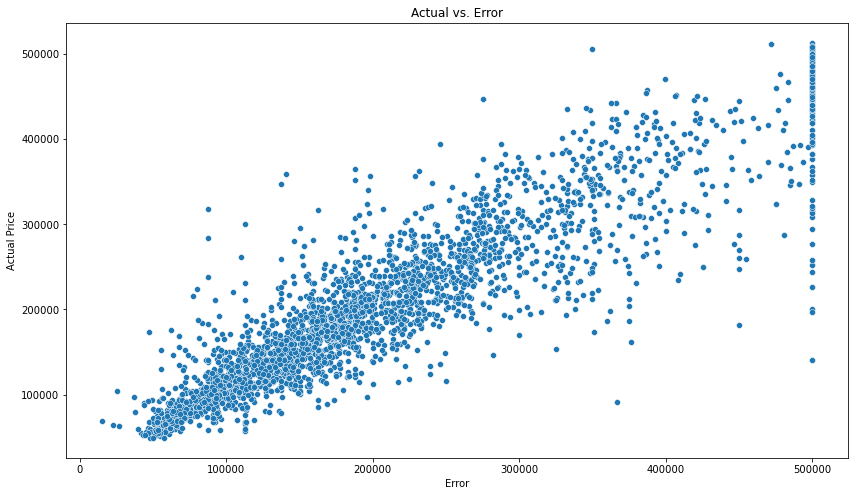

In [33]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_pred, y=y_test).set(title='Actual vs. Error', 
                                               xlabel='Error', 
                                               ylabel='Actual Price');

## Conclusion

- Model tidak bisa dipercaya ketika ocean_proximity <1H OCEAN, karena memiliki Error yang banyak
- Nilai RMSE dan MAE memiliki nilai yang besar karena jumlah Features masih kurang 

## Recommendation

- Menambahkan Data yang valid agar hasil yang di dapat semakin bagus
- Menambahkan jumlah Features agar nilai yang dihasilkan dari Machine Learning semakin baik
- Mencoba menggunakan Algoritma lain yang lebih beragam agar mendapatkan nilai RMSE dan MAE yang lebih rendah lagi sehingga jumlah Error yang di dapat tidak banyak

#### **Save Model**

In [34]:
import pickle

In [36]:
pickle.dump(RS_XGB, open('BestModel.pkl', 'wb'))

#### **Load model**

In [ ]:
# Model = joblib.load('BestModel.pkl')

# Thankyou!!!